In [1]:
import torch
import torch.nn as nn
import numpy as np
import scipy as sp
import pyamg
import math
import time
from Deep_sovler import *
import matplotlib.pyplot as plt
## This file produces the results in the paper

In [2]:
def heatmap2d(arr):
    plt.imshow(arr,cmap='viridis')
    plt.colorbar()
    plt.gcf()
    plt.show()

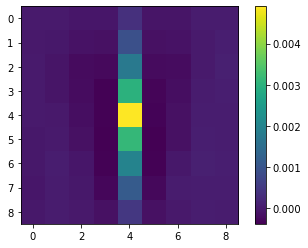

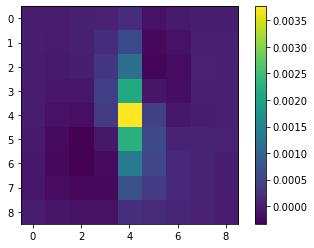

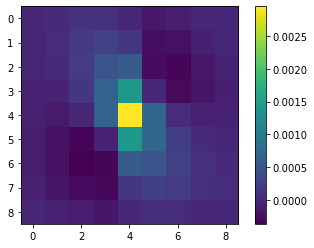

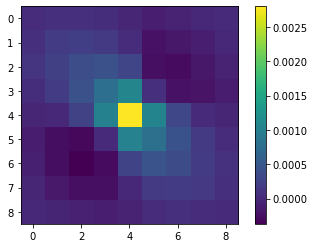

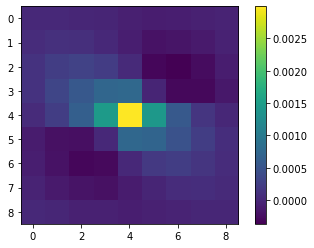

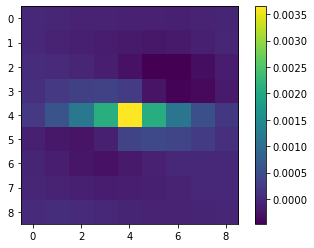

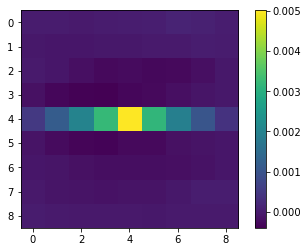

In [3]:
kernel = torch.load('./models/pattern/theta_0_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_15_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_30_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_45_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_60_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_75_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())
kernel = torch.load('./models/pattern/theta_90_eps_100_full_coarsening_1_kernel')
heatmap2d(kernel['convLayers1.0.weight'].view(9,9).detach().numpy())

In [4]:
eps = 100
theta = 0
stencil=diffusion_stencil_2d(eps,(theta/180)*sp.pi,'FD')*2
size=511
grid=(size,size)
A = pyamg.gallery.stencil_grid(stencil,grid,format='csr')
b = np.random.rand(size*size,10)
# args  = {'smoother':'w-jacobi','eps':100,'theta':45}
# model = torch.load('./models/theta_'+str(args['theta'])+'_eps_'+str(args['eps'])+'/theta_'+str(args['theta'])+'_eps_'+str(args['eps'])+'_level1')

C:\Users\ruhua\Anaconda3\lib\site-packages\pyamg\gallery\stencil.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  diag[s] = 0
C:\Users\ruhua\Anaconda3\lib\site-packages\pyamg\gallery\stencil.py:110: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  diag[s] = 0


In [13]:
print(stencil)

[[   0. -200.    0.]
 [  -2.  404.   -2.]
 [   0. -200.    0.]]


In [ ]:
from helper import *
from pyamg.krylov import fgmres
from scipy.sparse.linalg import LinearOperator
n = size
solver_w_jacobi = multigrid_solver(A=A,size = n,args = {'smoother':'w-jacobi','eps':eps,'theta':theta})
solver_a_CNN = multigrid_solver(A=A,size = n,args = {'smoother':'a-CNN','eps':eps,'theta':theta})
iter_w_jacobi = []
iter_cnn = []
t_w_jacobi = []
t_cnn = []
for i in range(10):
    def jac(v):
        x = solver_w_jacobi.solve(v,maxiter=1, tol=1e-6)
        return x
    def CNN(v):
        x = solver_a_CNN.solve(v,maxiter=1, tol=1e-6)
        return x
    pre_jac = LinearOperator((n*n,n*n), matvec=jac)
    pre_CNN = LinearOperator((n*n,n*n), matvec=CNN)
    # ada_no_jac_nets = get_neural_smoothers(args)
    # M0 = neural_smoother(ada_no_jac_nets[0],size)
    # # D0 = 2/3*sp.sparse.diags(1/sp.sparse.csr_matrix.diagonal(A)).tocsr()
    # D0 = 3/2*sp.sparse.diags(sp.sparse.csr_matrix.diagonal(A)).tocsr()
    res1=[]
    res2=[]
    t1=time.time()
    (x1,flag1) = fgmres(A,b[:,i], maxiter=500, tol=1e-6,restrt=30,M=pre_jac,residuals=res1)
    t2=time.time()
    (x2,flag2) = fgmres(A,b[:,i], maxiter=500, tol=1e-6,restrt=30,M=pre_CNN,residuals=res2)
    t3=time.time()
    iter_w_jacobi.append(len(res1))
    iter_cnn.append(len(res2))
    t_w_jacobi.append(t2-t1)
    t_cnn.append(t3-t2)
print('jacboi preconditioner iteration number',np.mean(iter_w_jacobi))
print('CNN preconditioner iteration number',np.mean(iter_cnn))
print('jacboi preconditioner time',np.mean(t_w_jacobi))
print('CNN preconditioner time',np.mean(t_cnn))

<font size="6">Compare damping factors of w-jacobi, CNN and a-CNN smoothers</font>

In [2]:
stencil=diffusion_stencil_2d(100,5*sp.pi/12,'FD')*2
n=16
grid=(n,n)
A = pyamg.gallery.stencil_grid(stencil,grid,format='csr')
t,w_jacobi,CNN,a_CNN,gs = compute_damping_factor(A,n)

C:\Users\ruhua\Anaconda3\lib\site-packages\pyamg\gallery\stencil.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  diag[s] = 0
C:\Users\ruhua\Anaconda3\lib\site-packages\pyamg\gallery\stencil.py:110: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  diag[s] = 0


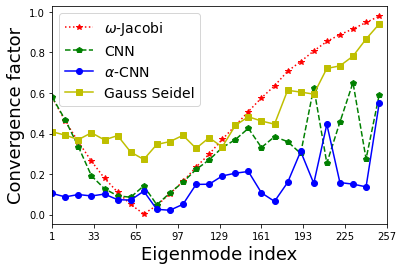

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.plot(t, w_jacobi, 'r*:',label=r'$\omega$-Jacobi')
plt.plot(t, CNN, 'g--p',label='CNN')
plt.plot(t, a_CNN, 'b-o',label=r'$\alpha$-CNN')
plt.plot(t, gs, 'ys-',label=r'Gauss Seidel')
plt.legend(fontsize=14)
plt.xlim(1,256)
plt.ylabel('Convergence factor',fontsize=18)
plt.xlabel('Eigenmode index',fontsize=18)
ax.set_xticks([1,33,65,97,129,161,193,225,257])

plt.show()

<font size="6">Compare convergence of w-jacobi and a-CNN smoothers on different grid sizes</font>

In [ ]:
stencil=diffusion_stencil_2d(100,5*sp.pi/12,'FD')*2
t = []
iters_w_jacobi = []
iters_a_CNN = []
t_w_jacobi = []
t_a_CNN = []
for i in range(5):
    n=2**(i+6)-1
    t.append(n)
    A = pyamg.gallery.stencil_grid(stencil,(n,n),format='csr')
    solver_w_jacobi = multigrid_solver(A=A,size = n,args = {'smoother':'w-jacobi','eps':100,'theta':75})
    solver_a_CNN = multigrid_solver(A=A,size = n,args = {'smoother':'a-CNN','eps':100,'theta':75})
    jacobi_i,jacobi_t = solve_systems(A,solver_w_jacobi)
    a_CNN_i,a_CNN_t = solve_systems(A,solver_a_CNN)
    iters_w_jacobi.append(jacobi_i)
    iters_a_CNN.append(a_CNN_i)
    t_w_jacobi.append(jacobi_t)
    t_a_CNN.append(a_CNN_t)
    print('size: '+str(n)+' w_jacobi '+' average iteration numbers: '+str(jacobi_i)+' average run time: '+str(jacobi_t))
    print('size: '+str(n)+' a_CNN '+' average iteration numbers: '+str(a_CNN_i)+' average run time: '+str(a_CNN_t))
fig, ax = plt.subplots(1, 1)
plt.plot(t, iters_w_jacobi, 'r*:',label=r'$\omega$-Jacobi')
plt.plot(t, iters_a_CNN, 'b-o',label=r'$\alpha$-CNN')
plt.legend(fontsize=14)
plt.ylabel('Iteration',fontsize=18)
plt.xlabel('Grid size',fontsize=18)
plt.ylim(0,300)
plt.show()
fig, ax = plt.subplots(1, 1)
plt.plot(t, t_w_jacobi, 'r*:',label=r'$\omega$-Jacobi')
plt.plot(t, t_a_CNN, 'b-o',label=r'$\alpha$-CNN')
plt.legend(fontsize=14)
plt.ylabel('Run Time',fontsize=18)
plt.xlabel('Grid size',fontsize=18)
plt.ylim(0,120)
plt.show()


<font size="6">Compare convergence of w-jacobi and a-CNN smoothers on different problems</font>

<font size="6"> Compute spectral radius</font>

In [5]:
eps = [100,200,300,400]
theta = 0
for i in range(len(eps)):
    stencil=diffusion_stencil_2d(eps[i],(theta/180)*sp.pi,'FD')*2
    r1 = compute_spectral(stencil,16,args = {'smoother':'a-CNN','eps':eps[i],'theta':theta}).item()
    r2 = compute_spectral(stencil,16,args = {'smoother':'w-jacobi','eps':eps[i],'theta':theta}).item()
    r3 = compute_spectral(stencil,16,args = {'smoother':'gs','eps':eps[i],'theta':theta}).item()
    print('theta: '+str(theta)+' eps: '+str(eps[i])+' a-CNN: '+str(r1)+' w-jacobi: '+str(r2)+' gs: '+str(r3))
eps = 100
theta = [0,15,30,45]
for i in range(len(theta)):
    stencil=diffusion_stencil_2d(eps,(theta[i]/180)*sp.pi,'FD')*2
    r1 = compute_spectral(stencil,16,args = {'smoother':'a-CNN','eps':eps,'theta':theta[i]}).item()
    r2 = compute_spectral(stencil,16,args = {'smoother':'w-jacobi','eps':eps,'theta':theta[i]}).item()
    r3 = compute_spectral(stencil,16,args = {'smoother':'gs','eps':eps,'theta':theta[i]}).item()
    print('theta: '+str(theta[i])+' eps: '+str(eps)+' a-CNN: '+str(r1)+' w-jacobi: '+str(r2)+' gs: '+str(r3))

theta: 0 eps: 100 a-CNN: (0.7659709869488767+0j) w-jacobi: 0.9886487331226015 gs: (0.9662361147021788+0j)
theta: 0 eps: 200 a-CNN: (0.8060094674929119+0j) w-jacobi: 0.9886487331225995 gs: (0.9662361147021783+0j)
theta: 0 eps: 300 a-CNN: (0.8588246976669734+0j) w-jacobi: 0.9886487331225983 gs: (0.9662361147021781+0j)
theta: 0 eps: 400 a-CNN: (0.7883407833354455+0j) w-jacobi: 0.9886487331226008 gs: (0.9662361147021775+0j)
theta: 0 eps: 100 a-CNN: (0.7659709869488767+0j) w-jacobi: 0.9886487331226015 gs: (0.9662361147021788+0j)
theta: 15 eps: 100 a-CNN: (0.7742971755306262+0j) w-jacobi: 0.9913403298014218 gs: (0.9735229599038724+0j)
theta: 30 eps: 100 a-CNN: (0.965178195688655+0j) w-jacobi: 0.9933883684872499 gs: (0.9797060605435218+0j)
theta: 45 eps: 100 a-CNN: (0.9727922192550476+0j) w-jacobi: 0.9942094310836573 gs: (0.9822821631963821+0j)


<font size="6"> Compute error bounds</font>

In [4]:
eps = [100,200,300,400]
theta = 0
for i in range(len(eps)):
    stencil=diffusion_stencil_2d(eps[i],(theta/180)*sp.pi,'FD')*2
    r1 = compute_bound_E(stencil,16,args = {'smoother':'a-CNN','eps':eps[i],'theta':theta})
    r2 = compute_bound_E(stencil,16,args = {'smoother':'w-jacobi','eps':eps[i],'theta':theta})
    r3 = compute_bound_E(stencil,16,args = {'smoother':'gs','eps':eps[i],'theta':theta})
    print('theta: '+str(theta)+' eps: '+str(eps[i])+' a-CNN: '+str(r1)+' w-jacobi: '+str(r2)+' g-s: '+str(r3))
eps = 100
theta = [0,15,30,45]
for i in range(len(theta)):
    stencil=diffusion_stencil_2d(eps,(theta[i]/180)*sp.pi,'FD')*2
    r1 = compute_bound_E(stencil,16,args = {'smoother':'a-CNN','eps':eps,'theta':theta[i]})
    r2 = compute_bound_E(stencil,16,args = {'smoother':'w-jacobi','eps':eps,'theta':theta[i]})
    r3 = compute_bound_E(stencil,16,args = {'smoother':'gs','eps':eps,'theta':theta[i]})
    print('theta: '+str(theta[i])+' eps: '+str(eps)+' a-CNN: '+str(r1)+' w-jacobi: '+str(r2)+' g-s: '+str(r3))

theta: 0 eps: 100 a-CNN: 0.7660043102932493 w-jacobi: 0.9886487331226013 g-s: 0.9674549097820627
theta: 0 eps: 200 a-CNN: 0.8060161630581373 w-jacobi: 0.9886487331226013 g-s: 0.9674639530750078
theta: 0 eps: 300 a-CNN: 0.8588306534943346 w-jacobi: 0.9886487331226012 g-s: 0.9674670069806868
theta: 0 eps: 400 a-CNN: 0.7883597203708107 w-jacobi: 0.9886487331226013 g-s: 0.9674685414159877
theta: 0 eps: 100 a-CNN: 0.7660043102932493 w-jacobi: 0.9886487331226013 g-s: 0.9674549097820627
theta: 15 eps: 100 a-CNN: 0.774305592444005 w-jacobi: 0.9913403298014202 g-s: 0.9748378179559861
theta: 30 eps: 100 a-CNN: 0.9651782421638717 w-jacobi: 0.9933883684872492 g-s: 0.9807592721229424
theta: 45 eps: 100 a-CNN: 0.9727922510200281 w-jacobi: 0.9942094310836566 g-s: 0.9833108138321338
